In [ ]:
"""
CSCI 680-0K11 - Assignment 3 - Fall 2019

Author:   Sneha Ravi Chandran
Z-ID:     Z1856678
Date Due: October 29, 2019 at 11:59pm

Purpose:  To implement multilayer perceptron and apply it
          using Tensorflow/ Keras library.

"""
import numpy as np
from sklearn .model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
# to ignore the warnings
import warnings                                                                 
warnings.filterwarnings('ignore')

In [ ]:
'''
 Taking a total sample and splitting it as 26800 and 13200 of the total 40000 for the train and
 test dataset respectively. 
'''
num_observations = 10000

x1 = np.random.multivariate_normal([0, 0],[[0.1, 0.2],[0.2, 0.1]], num_observations)
x2 = np.random.multivariate_normal([3, 3],[[0.1, 0.2],[0.2, 0.1]], num_observations)
x3 = np.random.multivariate_normal([3, 0],[[0.1, 0.2],[0.2, 0.1]], num_observations)
x4 = np.random.multivariate_normal([0, 3],[[0.1, 0.2],[0.2, 0.1]], num_observations)

features = np.vstack((x1, x2, x3, x4)).astype(np.float32)
labels = np.hstack((np.full(num_observations, 0), np.full(num_observations, 1), np.full(2 * num_observations, 2)))

# shape of X_train is (26800, 2), X_test is (13200, 2), y_train is (26800,), y_test is (13200,)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.33, random_state = 42)
  

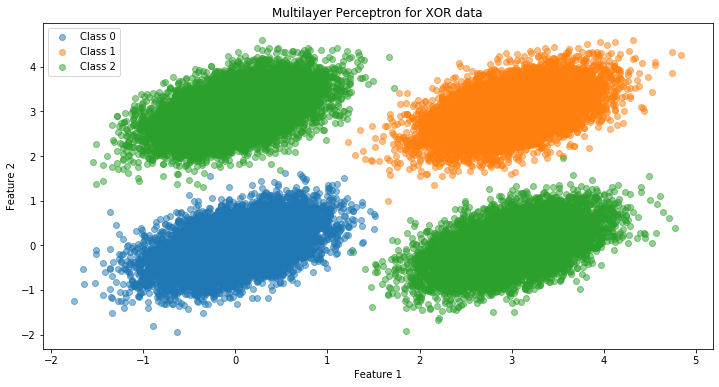

In [ ]:
'''
Visualizing the data before implementing the algorithm using scatter plot for the
samples. Each sample will have a color and shape depending on which class (0 , 1 or 2) 
it belongs to for the XOR data.
'''
plt.figure(figsize=(12,6))
plt.scatter(features[labels == 0, 0],features[labels == 0, 1], label='Class 0', alpha = 0.5)
plt.scatter(features[labels == 1, 0],features[labels == 1, 1], label='Class 1', alpha = 0.5)
plt.scatter(features[labels == 2, 0],features[labels == 2, 1], label='Class 2', alpha =  0.5)

# plotting the label text
plt.title('Multilayer Perceptron for XOR data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# mentioning the legend for the plot
plt.legend(loc='best')
plt.show()

In [ ]:
def fully_connected_network(layer_1_node, layer_2_node, dropout):
  '''
  Purpose:  To train our neural network model as fully connected network with 2 
            hidden layers taking different dropout values for each settings
  Argument: Passing 2 hidden layers and dropout value
  Returns:  Returns the model
  ''' 
  model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(layer_1_node, activation='relu'),
    tf.keras.layers.Dropout(dropout),
    tf.keras.layers.Dense(layer_2_node, activation='softmax')                   # Building the tf.keras.Sequential model by stacking layers and the activation
  ])                                                                            # function used are ReLU and Softmax The model is implemented with one dropout
                                                                                
  '''
  Compile the model with the optimizer having adaptive moment estimation, loss 
  function as sparse_categorical_crossentropy used to calculate the variation 
  between the observed class labels distribution and the predicted class
  probability
  '''
  model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])                                             # choosing an optimizer and loss funtion for training
  
  return model

In [ ]:
# Visualising the Test set results
def plot_decision_boundary(X, y, model):
  '''
  Purpose:  Function to plot the decision boundary and data points of a model 
            and visualize it. Data points are colored based on their actual label.
  Argument: Passing X_test, y_pred and model
  ''' 
  
  plt.figure(figsize = (12,6))                                                  # Gives the size of the figure drawn with matplotlib 
  x_start, x_stop = X[:, 0].min() - 1, X[:, 0].max() + 1                        # The data limits(min and max values) are specified in the region of interest as x_start, x_stop, y_start, y_stop
  y_start, y_stop = X[:, 1].min() - 1, X[:, 1].max() + 1

  x_span = np.arange(x_start, x_stop, step = 0.01)                              # x_span, y_span is an ndarray that takes evenly spaced values taking the interval of start, 
  y_span = np.arange(y_start, y_stop, step = 0.01)                              # end and the steps between the values

  xx, yy = np.meshgrid(x_span,y_span)                                           # xx, yy holds a rectangular grid created out of an array of x and y values.

  plt.contourf(xx, yy, model.predict_classes(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape),
               alpha = 0.3, cmap = ListedColormap(('blue', 'orange','green')))  # finding the predictions over the specified region of interest from above and plotting for the same

  plt.scatter(X[y == 0, 0], X[y == 0, 1], label = 'Class 0')                    # Clustering testing feature of the XOR data based on the class labels
  plt.scatter(X[y == 1, 0], X[y == 1, 1], label = 'Class 1')
  plt.scatter(X[y == 2, 0], X[y == 2, 1], label = 'Class 2')
  
  plt.title('Decision Boundary for the distribution According to Classes')      # plotting the label text and axes
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.legend(loc='best')                                                        # mentioning the legend for the plot
  plt.show()
  

**Setting 1**
> **Nodes in first hidden layer:** 10 


> **Nodes in second hidden layer:** 10


> **Dropout:** 0.1


> **Observation:** A decision boundary plotting is a hypersurface that partitions the given vector space, for each class for the XOR data (because the XOR classes are not linearly separable). For 1st setting decision boundary plotting is much better than 3rd setting while having very few point out of the boundary.




In [ ]:
# model_settings1 holds the compiled model for the 1st setting for two layers with a dropout value 
model_settings1 = fully_connected_network(10,10,0.1)

#Fit and Evaluate Model
model_settings1.fit(X_train, y_train, epochs=5)                                  
model_settings1.evaluate(X_test,  y_test, verbose=2)

Train on 26800 samples
Epoch 1/5
26800/26800 [==============================] - 2s 62us/sample - loss: 1.0211 - accuracy: 0.6259
Epoch 2/5
26800/26800 [==============================] - 1s 52us/sample - loss: 0.2195 - accuracy: 0.9362
Epoch 3/5
26800/26800 [==============================] - 1s 52us/sample - loss: 0.0996 - accuracy: 0.9561
Epoch 4/5
26800/26800 [==============================] - 1s 52us/sample - loss: 0.0681 - accuracy: 0.9819
Epoch 5/5
26800/26800 [==============================] - 1s 53us/sample - loss: 0.0445 - accuracy: 0.9888
13200/1 - 0s - loss: 0.0076 - accuracy: 0.9983


[0.00941373234586508, 0.9982576]

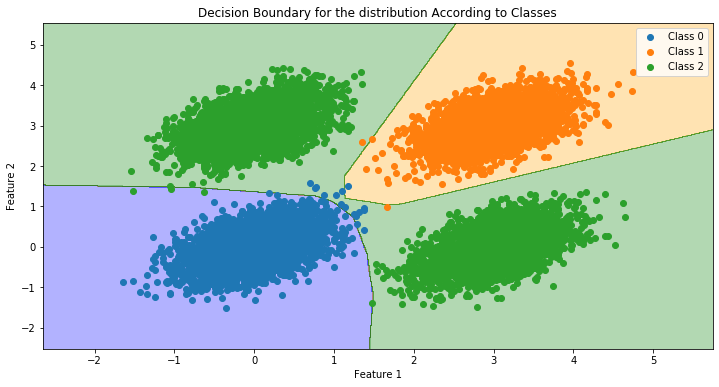

In [ ]:
# visualizing the decision boundary
plot_decision_boundary(X_test, y_test, model_settings1)            # calling the plot_decision_boundary function by passing test features, test labels and model setting

**Setting 2**
> **Nodes in first hidden layer**: 20 


> **Nodes in second hidden layer**: 30


> **Dropout**: 0.1

> **Observations**: This is fairly similar to the 1st setting, we increase the number of nodes in each hidden layer from the 1st model.  Also, it seems to classify the sample with fewer point of a class outside its corresponding boundary. 


In [ ]:
# model_settings2 holds the compiled model for the 2nd setting for two layers with a dropout value 
model_settings2 = fully_connected_network(20,30,0.1)

#Fit and Evaluate Model
model_settings2.fit(X_train, y_train, epochs=5)
model_settings2.evaluate(X_test,  y_test, verbose=2)

Train on 26800 samples
Epoch 1/5
26800/26800 [==============================] - 2s 75us/sample - loss: 0.6335 - accuracy: 0.8622
Epoch 2/5
26800/26800 [==============================] - 1s 53us/sample - loss: 0.0417 - accuracy: 0.9953
Epoch 3/5
26800/26800 [==============================] - 1s 56us/sample - loss: 0.0196 - accuracy: 0.9973
Epoch 4/5
26800/26800 [==============================] - 1s 55us/sample - loss: 0.0129 - accuracy: 0.9978
Epoch 5/5
26800/26800 [==============================] - 1s 55us/sample - loss: 0.0096 - accuracy: 0.9978
13200/1 - 0s - loss: 0.0019 - accuracy: 0.9997


[0.0028370972494171426, 0.99969697]

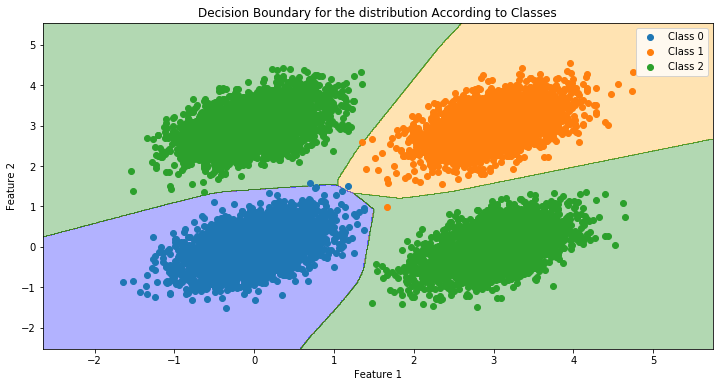

In [ ]:
# visualizing the decision boundary
plot_decision_boundary(X_test, y_test, model_settings2)            # calling the plot_decision_boundary function by passing test features, test labels and model setting

**Setting 3**
> **Nodes in first hidden layer:** 50 


> **Nodes in second hidden layer:** 50


> **Dropout:** 0.8

> **Observation:** The one with the most least accuracy is the 3rd setting model since the dropout rate is high more of the test sample points are out of the plotted decision boundary.


In [ ]:
# model_settings3 holds the compiled model for the 3rd setting for two layers with a dropout value 
model_settings3 = fully_connected_network(50,50,0.8)

#Fit and Evaluate Model
model_settings3.fit(X_train, y_train, epochs=5)
model_settings3.evaluate(X_test,  y_test, verbose=2)

Train on 26800 samples
Epoch 1/5
26800/26800 [==============================] - 2s 70us/sample - loss: 0.9837 - accuracy: 0.7485
Epoch 2/5
26800/26800 [==============================] - 2s 59us/sample - loss: 0.2836 - accuracy: 0.8946
Epoch 3/5
26800/26800 [==============================] - 2s 58us/sample - loss: 0.2210 - accuracy: 0.9176
Epoch 4/5
26800/26800 [==============================] - 2s 58us/sample - loss: 0.1974 - accuracy: 0.9254
Epoch 5/5
26800/26800 [==============================] - 2s 56us/sample - loss: 0.1821 - accuracy: 0.9319
13200/1 - 0s - loss: 0.0383 - accuracy: 0.9943


[0.03785645601085641, 0.9943182]

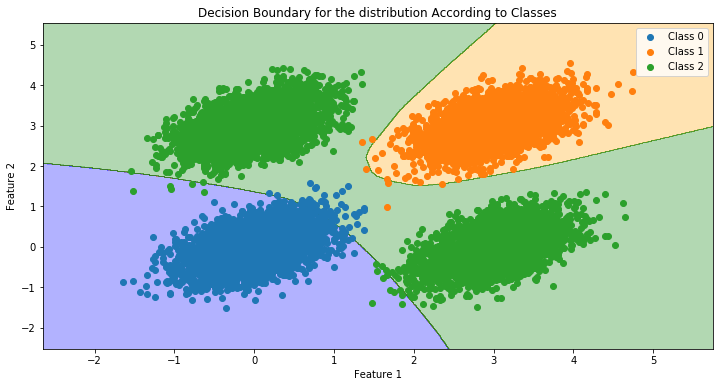

In [ ]:
# visualizing the decision boundary
plot_decision_boundary(X_test, y_test, model_settings3)            # calling the plot_decision_boundary function by passing test features, test labels and model setting

**Setting 4**
> **Nodes in first hidden layer:** 50

> **Nodes in second hidden layer:** 50

> **Dropout:** 0.1

> **Observations:**  After trying out 5 different settings for two hidden layer each with a dropout value, the model for setting 4 and 5 seems to be more closer than the rest. In comparison with model 3 they have the same nodes used in both the layers while the dropout values is relatively lower than model3.


In [ ]:
# model_settings4 holds the compiled model for the 4th setting for two layers with a dropout value
model_settings4 = fully_connected_network(50,50,0.1)

# Fit and evaluate Model
model_settings4.fit(X_train, y_train, epochs=5)
model_settings4.evaluate(X_test,  y_test, verbose=2)

Train on 26800 samples
Epoch 1/5
26800/26800 [==============================] - 2s 70us/sample - loss: 0.5360 - accuracy: 0.9062
Epoch 2/5
26800/26800 [==============================] - 2s 58us/sample - loss: 0.0164 - accuracy: 0.9984
Epoch 3/5
26800/26800 [==============================] - 2s 58us/sample - loss: 0.0074 - accuracy: 0.9991
Epoch 4/5
26800/26800 [==============================] - 2s 57us/sample - loss: 0.0045 - accuracy: 0.9994
Epoch 5/5
26800/26800 [==============================] - 2s 60us/sample - loss: 0.0031 - accuracy: 0.9993
13200/1 - 0s - loss: 9.6456e-04 - accuracy: 0.9998


[0.0014855467795154475, 0.9998485]

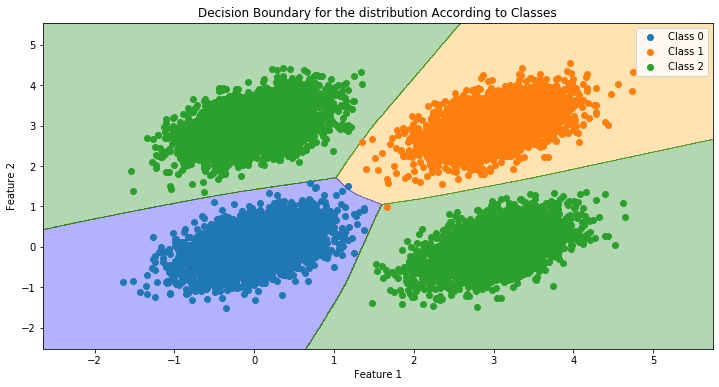

In [ ]:
# visualizing the decision boundary
plot_decision_boundary(X_test, y_test, model_settings4)            # calling the plot_decision_boundary function by passing test features, test labels and model setting

**Setting 5**
> **Nodes in first hidden layer:** 100 


> **Nodes in second hidden layer:** 100


> **Dropout:** 0.5

> **Observations:**It shows a fairly good decision boundary in comparision with the fourth model and seem to classify the sample well.


In [ ]:
# model_settings5 holds the compiled model for the 5th setting for two layers with a dropout value 
model_settings5 = fully_connected_network(100,100,0.5)

# Fit and evaluate Model
model_settings5.fit(X_train, y_train, epochs=5)
model_settings5.evaluate(X_test,  y_test, verbose=2)

Train on 26800 samples
Epoch 1/5
26800/26800 [==============================] - 2s 77us/sample - loss: 0.5122 - accuracy: 0.9113
Epoch 2/5
26800/26800 [==============================] - 2s 64us/sample - loss: 0.0278 - accuracy: 0.9946
Epoch 3/5
26800/26800 [==============================] - 2s 64us/sample - loss: 0.0146 - accuracy: 0.9968
Epoch 4/5
26800/26800 [==============================] - 2s 65us/sample - loss: 0.0087 - accuracy: 0.9984
Epoch 5/5
26800/26800 [==============================] - 2s 66us/sample - loss: 0.0071 - accuracy: 0.9983
13200/1 - 0s - loss: 0.0010 - accuracy: 0.9998


[0.0016422966559713876, 0.9997727]

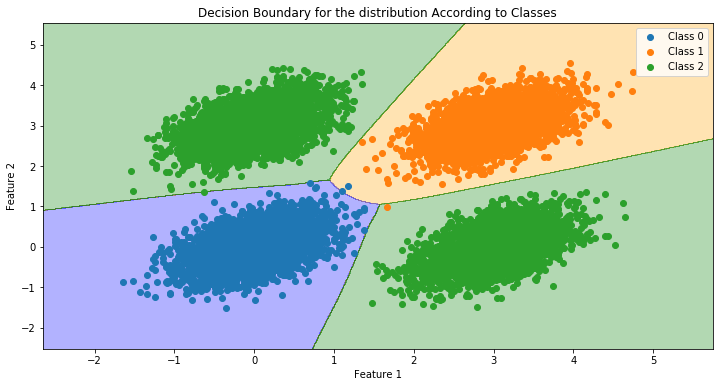

In [ ]:
# visualizing the decision boundary
plot_decision_boundary(X_test, y_test, model_settings5)            # calling the plot_decision_boundary function by passing test features, test labels and model setting